                                                # Titanic Machine Learning From Disaster
Por: 

Emilia Victoria Jácome Iñiguez - A00828347

Gilberto Ramos Salinas -A01734128

Aylin Camacho -A01379272

Luis Daniel Cano -A0

# **Preliminares**

## Importar Librerías Generales

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

## Definir los dataframes

In [ ]:
df_train = pd.read_csv('train.csv') #generar el dataframe con los datos del titanic
df_test = pd.read_csv('test.csv') #generar el dataframe con los datos del titanic
df_gs = pd.read_csv('gender_submission.csv') #generar el dataframe con los datos del titanic

In [ ]:
df = df_train


# **Exploración de Datos**

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
##Mostrar dimensiones del dataset
df.shape
#1309 reglones y 12 columnas

(891, 12)

## Tipos de Datos

In [ ]:
##Resumen del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
##Ver el tipo de Datos
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Medidas Estadísticas de los datos

In [ ]:
##Descripción de Variables Numéricas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
##Descripción de variables Cualitativas
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Revisar inconsistencias

In [ ]:
##Checar valores no nulos
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
##Checar valores nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
##Checar blancos
df.isna().sum()
df.shape

(891, 12)

# **Transformación de Datos**

## **Eliminar Registros con valores nulos o Nan**

In [ ]:

df = df.drop(columns=['Cabin','Embarked'])

In [ ]:
df.dropna(axis=0,how='any',inplace=True)
df.shape
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [ ]:
##Verificar que no existan valores nulos
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [ ]:
newData = df 
newData["sex_num"] = 0
newData.loc[newData['Sex'] == 'female', 'sex_num'] = 1
newData 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0


# **Visualización de la Data**

In [ ]:
fig = px.bar(df, x='Pclass', y='Survived')
fig.show()

In [ ]:
# import plotly.express as px
# df = px.data.gapminder()
# fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
#            hover_name="country", log_x=True, size_max=60)
# df.head()

In [ ]:
fig = px.bar(df, x='Sex', y='Survived')
fig.show()

In [ ]:
fig = px.scatter(df.query("Age>=50 & Sex=='male'" ) , x="Age", y="Survived", size="Pclass", color="Pclass",
           hover_name="Name", log_x=True, size_max=60)
fig.show()

A traves de la siguiente grafica podemos observar una Distribucion Acumulativa Empirica que demuestra la cantidad de hombres y mujeres que se encontraban dentro de la enbarcacion. Esta misma es capaz de demostrar la edad de los pasajeros y si estos sobrevivieron. A continuacion de esta misma grafica se mostrara la relacion que tuvieron las muertes respecto la edad especificada.


In [ ]:
# def hierarchy(condition):
#     fig = px.ecdf(df.query(condition), x="Age", color="Sex",animation_frame="Survived")
#     fig.show()

In [ ]:
# # Primera Infancia (0-5 años)
# hierarchy("Age>=0 & Age<=5 ")
# # Infancia (6 - 11 años)
# hierarchy("Age>=6 & Age<=11 ")
# # Adolescencia (12 - 18 años)
# hierarchy("Age>=12 & Age<=18 ")
# # Juventud (14 - 26 años)
# hierarchy("Age>=14 & Age<=26 ")
# # Adultez (27- 59 años)
# hierarchy("Age>=27 & Age<=59 ")
# # Persona Mayor (60 años o mas) envejecimiento y vejez
# hierarchy("Age<=60")

fig = px.violin(df.query("Survived ==1"), y="Age", x="Survived", color="Sex", box=True, points="all", hover_data=df.columns)
fig.show()

In [ ]:
fig = px.ecdf(df, x="Age", color="Sex",animation_frame="Survived")
fig.show()

In [ ]:
def hierarchy(cond):
    inf = df.query("(Age>=0 & Age<=12) &" + cond)
    ado = df.query("(Age>=12 & Age<=18) &" + cond)
    juv = df.query("(Age>=18 & Age<=30) &"+ cond)
    adul = df.query("(Age>=30 & Age<=59) &"+ cond)
    may = df.query("Age>=60 & "+ cond)

    return [len(inf), len(ado), len(juv), len(adul),len(may)] 

In [ ]:
stages = ["Infancia", "Adolecencia", "Juventud", "Adultez","Persona Mayor"]
df_mtl = pd.DataFrame(dict(number=hierarchy("Survived == 1 & Sex=='male'"), stage=stages))
df_mtl['Sex'] = 'male'
df_toronto = pd.DataFrame(dict(number=hierarchy("Survived == 1 & Sex=='female'"), stage=stages))
df_toronto['Sex'] = 'female'
df = pd.concat([df_mtl, df_toronto], axis=0)
fig = px.funnel(df, x='number', y='stage', color='Sex', title="Supervivencia por Fases y Genero")
fig.show()

In [ ]:
df.tail(5)

,number,stage,Sex
0,19,Infancia,female
1,27,Adolecencia,female
2,76,Juventud,female
3,88,Adultez,female
4,4,Persona Mayor,female


# **Aplicación de Modelos de Clasificación**

## *Definir las variables que se van a predecir*

In [ ]:
# variables independientes , 'Sex', 'Pclass', 'Embarked'
df = newData
X = df[['Age', 'sex_num', 'Pclass']].values
y = df['Survived'].values  # variable dependiente
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  sex_num      714 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 66.9+ KB


## Importar librerías

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

### Librerías para Evaluación y Validación de Modelos

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

## Selección de Modelos a Utilizar

In [ ]:
models = []
models.append(('K-Neighbors', KNeighborsClassifier()))
models.append(('Bayes', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('Regresion Logistica', LogisticRegression()))
models.append(('Arboles Desicion', DecisionTreeClassifier()))
models.append(('Redes Neuronales', MLPClassifier()))
models.append(('Bosques Aleatorios', RandomForestClassifier()))


## Dividir los datos en entrenamiento y testing

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Entrenamiento de Modelos de Clasificación

### Entrenamiento general de Modelos

In [ ]:
names = [] #Arreglo Vacío de Nombres
accu_scores = [] #Arreglo Vacío de Accuracys
accuracies = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accu_scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': accu_scores})
print(tr_split)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



                  Name     Score
0          K-Neighbors  0.726257
1                Bayes  0.782123
2                  SVC  0.592179
3  Regresion Logistica  0.821229
4     Arboles Desicion  0.793296
5     Redes Neuronales  0.776536
6   Bosques Aleatorios  0.770950


### K-neighbors

In [ ]:
algoritmo_kNN = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p = 2)
algoritmo_kNN.fit(X_train, y_train)
y_pred_kNN = algoritmo_kNN.predict(X_test)
#p=1: Distancia euclideana
#p=2: Distancia Manhattan

In [ ]:
#Se utiliza el método accuracy para calcular la exactitud del modelo. Checa cuantos si coinciden. 
accuracy_kNN = metrics.accuracy_score(y_test, y_pred_kNN)
accuracy_kNN = round(accuracy_kNN, 2) * 100

accuracies.append(accuracy_kNN)

print("La exactitud del modelo K-NN es:")
print(accuracy_kNN, "%")

La exactitud del modelo K-NN es:
73.0 %


### *Bayes (Clasificación)*


In [ ]:
algoritmo_BAY = GaussianNB()
algoritmo_BAY.fit(X_train, y_train)
y_pred_BAY = algoritmo_BAY.predict(X_test)

In [ ]:
accuracy_BAY = metrics.accuracy_score(y_test, y_pred_BAY)
accuracy_BAY = round(accuracy_BAY, 2) * 100

accuracies.append(accuracy_BAY)

print("Exactitud del modelo Naive Bayes: ")
print(accuracy_BAY, "%")



Exactitud del modelo Naive Bayes: 
78.0 %


### *SVC Support Vector Machine (Clasificación)*

In [ ]:
algoritmo_SVC = SVC(kernel = "linear")
algoritmo_SVC.fit(X_train, y_train)
y_pred_SVC = algoritmo_SVC.predict(X_test)

In [ ]:
accuracy_SVC = metrics.accuracy_score(y_test, y_pred_SVC)
accuracy_SVC = round(accuracy_SVC, 2) * 100

accuracies.append(accuracy_SVC)

print("Exactitud del modelo SVC:")
print(accuracy_SVC, "%")

Exactitud del modelo SVC:
78.0 %


### *Regresión Logística (Clasificación)*

In [ ]:
algoritmo_LOG = LogisticRegression(max_iter=10000) #es necesario poner el número de iteraciones
algoritmo_LOG.fit(X_train, y_train)
y_pred_LOG = algoritmo_LOG.predict(X_test)

In [ ]:
accuracy_LOG = metrics.accuracy_score(y_test, y_pred_LOG)
accuracy_LOG = round(accuracy_LOG, 2) * 100

accuracies.append(accuracy_LOG)

print("Exactitud del modelo Regresión Logística:")
print(accuracy_LOG, "%")

Exactitud del modelo Regresión Logística:
82.0 %


### *Árboles de Desición (Clasificación)*

In [ ]:
algoritmo_TREE = DecisionTreeClassifier(criterion = "gini", random_state=1234, max_depth=3)
algoritmo_TREE.fit(X_train, y_train)
y_pred_TREE = algoritmo_TREE.predict(X_test)

In [ ]:
accuracy_TREE = metrics.accuracy_score(y_test, y_pred_TREE)
accuracy_TREE = round(accuracy_TREE, 2) * 100

accuracies.append(accuracy_TREE)

print("Exactitud del modelo Árboles de Desición:")
print(accuracy_TREE, "%")

Exactitud del modelo Árboles de Desición:
78.0 %


### *Redes Neuronales*

In [ ]:
algoritmo_MLP = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
algoritmo_MLP.fit(X_train,y_train)

y_pred_MLP = algoritmo_MLP.predict(X_test)

#Extras para la matriz de confusión
predict_train = algoritmo_MLP.predict(X_train)
predict_test = algoritmo_MLP.predict(X_test)

In [ ]:
accuracy_MLP = metrics.accuracy_score(y_test, y_pred_MLP)
accuracy_MLP = round(accuracy_MLP, 2) * 100

accuracies.append(accuracy_MLP)

print("Exactitud del modelo Redes Neuronales:")
print(accuracy_TREE, "%")

Exactitud del modelo Redes Neuronales:
78.0 %


### *Random Forrest*

In [ ]:
algoritmo_RF = RandomForestClassifier(n_estimators = 100, criterion = "entropy")
algoritmo_RF.fit(X_train, y_train)
y_pred_RF = algoritmo_RF.predict(X_test)

In [ ]:
accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
accuracy_RF = round(accuracy_RF, 2) * 100

accuracies.append(accuracy_RF)

print("Exactitud del modelo Bosques Aleatorios:")
print(accuracy_RF, "%")

Exactitud del modelo Bosques Aleatorios:
77.0 %


# **Evaluación de los Modelos**

## *Matriz de Confusión*

In [ ]:
#Imprimir las matrices de confusión para todos los modelos
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Matriz de Confusión para ", name, confusion_matrix(y_test,y_pred))
    print("Reporte de Clasificación para ", name, classification_report(y_test,y_pred))

Matriz de Confusión para  K-Neighbors [[82 21]
 [28 48]]
Reporte de Clasificación para  K-Neighbors               precision    recall  f1-score   support

           0       0.75      0.80      0.77       103
           1       0.70      0.63      0.66        76

    accuracy                           0.73       179
   macro avg       0.72      0.71      0.72       179
weighted avg       0.72      0.73      0.72       179

Matriz de Confusión para  Bayes [[87 16]
 [23 53]]
Reporte de Clasificación para  Bayes               precision    recall  f1-score   support

           0       0.79      0.84      0.82       103
           1       0.77      0.70      0.73        76

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Matriz de Confusión para  SVC [[97  6]
 [67  9]]
Reporte de Clasificación para  SVC               precision    recall  f1-score   support

           0       

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Matriz de Confusión para  Redes Neuronales [[86 17]
 [22 54]]
Reporte de Clasificación para  Redes Neuronales               precision    recall  f1-score   support

           0       0.80      0.83      0.82       103
           1       0.76      0.71      0.73        76

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Matriz de Confusión para  Bosques Aleatorios [[84 19]
 [21 55]]
Reporte de Clasificación para  Bosques Aleatorios               precision    recall  f1-score   support

           0       0.80      0.82      0.81       103
           1       0.74      0.72      0.73        76

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



## *Método de Train/Test Split*

### *Validación*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df.Survived, random_state=0)

#Definir arreglos vacíos para cada score
model_names = []
scores_tr_split_a = []
scores_tr_split_p = []
scores_tr_split_r = []
scores_tr_split_f1 = []

#Obtener las métricas de Evaluación para cada modelo
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores_tr_split_a.append(accuracy_score(y_test, y_pred))
    scores_tr_split_p.append(metrics.precision_score(y_test, y_pred))
    scores_tr_split_r.append(metrics.recall_score(y_test, y_pred))
    scores_tr_split_f1.append(metrics.f1_score(y_test, y_pred))
    model_names.append(name)
    
#Generar DataFrame con las métricas de evaluación para cada modelo
tr_split = pd.DataFrame({'Name': model_names, 'Score_a': scores_tr_split_a, 'Score_p': scores_tr_split_p, 'Score_r':scores_tr_split_r, 'Score_f1':scores_tr_split_f1})

#Imprimir el dataframe con métricas
print(tr_split)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



                  Name   Score_a   Score_p   Score_r  Score_f1
0          K-Neighbors  0.743017  0.714286  0.616438  0.661765
1                Bayes  0.821229  0.847458  0.684932  0.757576
2                  SVC  0.603352  0.600000  0.082192  0.144578
3  Regresion Logistica  0.826816  0.850000  0.698630  0.766917
4     Arboles Desicion  0.776536  0.800000  0.602740  0.687500
5     Redes Neuronales  0.832402  0.864407  0.698630  0.772727
6   Bosques Aleatorios  0.793296  0.790323  0.671233  0.725926


#### *Exactitud*

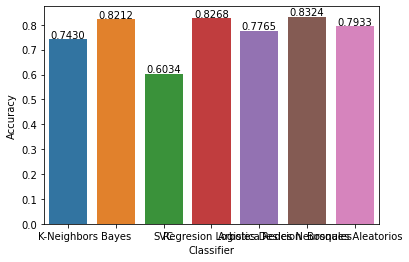

In [ ]:
axis = sns.barplot(x = tr_split['Name'], y = tr_split['Score_a'], data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

#### *Precisión*

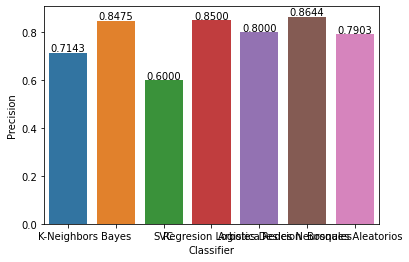

In [ ]:
axis = sns.barplot(x = tr_split['Name'], y = tr_split['Score_p'], data = tr_split)
axis.set(xlabel='Classifier', ylabel='Precision')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

#### *Especificidad*

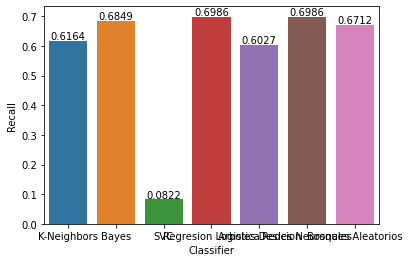

In [ ]:
axis = sns.barplot(x = tr_split['Name'], y = tr_split['Score_r'], data = tr_split)
axis.set(xlabel='Classifier', ylabel='Recall')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

#### *F1 Score*

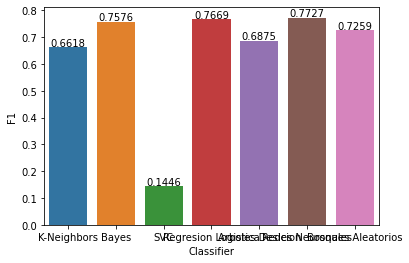

In [ ]:
axis = sns.barplot(x = tr_split['Name'], y = tr_split['Score_f1'], data = tr_split)
axis.set(xlabel='Classifier', ylabel='F1')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

## *Método de Validación K-Fold Cross*

### *Importar Librerías para Validación K-Fold Cross*

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

### *Validación*

In [ ]:
#Definir arreglos vacíos para cada score
model_names = []
scores_kf_a = []
scores_kf_p = []
scores_kf_r = []
scores_kf_f1 = []

#Obtener las métricas de Evaluación para cada modelo
for name, model in models: 
    kfold = KFold(n_splits=10, random_state=10, shuffle=True) 
    scoring = ['accuracy', 'precision','recall','f1']
    results = cross_validate(model, X, y, cv=kfold, scoring=scoring)
    model_names.append(name)
    scores_kf_a.append(np.mean(results['test_accuracy']))
    scores_kf_p.append(np.mean(results['test_precision']))
    scores_kf_r.append(np.mean(results['test_recall']))
    scores_kf_f1.append(np.mean(results['test_f1']))

#Generar DataFrame con las métricas de evaluación para cada modelo
kf_cross_val = pd.DataFrame({'Name': names, 'Score_a': scores_kf_a, 'Score_p':scores_kf_p, 'Score_r':scores_kf_r, 'Score_f1':scores_kf_f1})

#Imprimir el dataframe con métricas
print(kf_cross_val)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

                  Name   Score_a   Score_p   Score_r  Score_f1
0          K-Neighbors  0.772946  0.755000  0.644659  0.692607
1                Bayes  0.780164  0.747386  0.681896  0.712862
2                  SVC  0.616373  0.691111  0.120776  0.200090
3  Regresion Logistica  0.791315  0.760520  0.707199  0.731722
4     Arboles Desicion  0.820638  0.827404  0.701365  0.757184
5     Redes Neuronales  0.791315  0.762288  0.707336  0.730325
6   Bosques Aleatorios  0.817821  0.800319  0.732954  0.762832


#### *Exactitud*

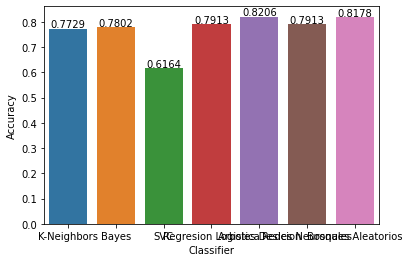

In [ ]:
#We can plot the accuracy scores using seaborn
axis = sns.barplot(x = kf_cross_val['Name'], y = kf_cross_val['Score_a'], data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

#### *Precisión*

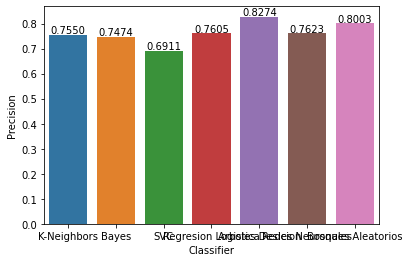

In [ ]:
#We can plot the accuracy scores using seaborn
axis = sns.barplot(x = kf_cross_val['Name'], y = kf_cross_val['Score_p'], data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Precision')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

#### *Especificidad*

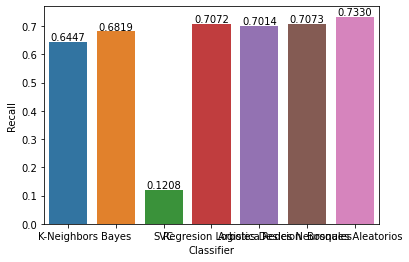

In [ ]:
#We can plot the accuracy scores using seaborn
axis = sns.barplot(x = kf_cross_val['Name'], y = kf_cross_val['Score_r'], data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Recall')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

#### *F1 Score*

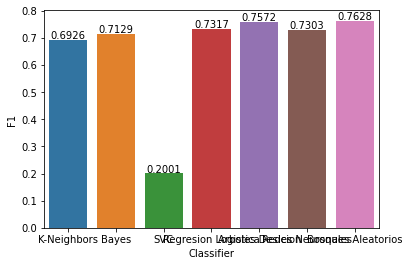

In [ ]:
#We can plot the accuracy scores using seaborn
axis = sns.barplot(x = kf_cross_val['Name'], y = kf_cross_val['Score_f1'], data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='F1')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

# **Conclusiones y Resultados**

A traves del estudio realizado anteriormente podemos extrapolar 